plots of SOG model run
- 1100 x 10 x 101 domain
- 1 day
- river on

In [1]:
import os
import re
import netCDF4 as nc

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
f=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run08dec15_riv_OBC/SalishSea_1h_20151208_20151209_grid_T.nc')
fb=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run08dec15_riv_OBC/SalishSea_1h_20151208_20151209_ptrc_T.nc')
fkeys=fb.variables.keys()
print(fkeys)
lons=f.variables['nav_lon'][1,:]
lats=f.variables['nav_lat'][:,1]
for ik in fkeys:
    match = re.search(r'depth.',ik)
    if match:
        zkey=match.group(0)
z=f.variables[zkey][:]
t=f.variables['time_counter'][:]
xx,zz=np.meshgrid(lons,-z[:])
tt,tz=np.meshgrid(t,-z[:])
xt,yt=np.meshgrid(lons,lats)
x0,y0=np.meshgrid(lons,lats)

fm=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_full_01/mesh_mask.nc')
mesh=fm.variables['tmask'][:,:,:,:]

KeysView(OrderedDict([('nav_lat', <class 'netCDF4._netCDF4.Variable'>
float32 nav_lat(y, x)
    standard_name: latitude
    long_name: Latitude
    units: degrees_north
    nav_model: grid_T
unlimited dimensions: 
current shape = (898, 398)
filling off
), ('nav_lon', <class 'netCDF4._netCDF4.Variable'>
float32 nav_lon(y, x)
    standard_name: longitude
    long_name: Longitude
    units: degrees_east
    nav_model: grid_T
unlimited dimensions: 
current shape = (898, 398)
filling off
), ('deptht', <class 'netCDF4._netCDF4.Variable'>
float32 deptht(deptht)
    long_name: Vertical T levels
    units: m
    axis: Z
    positive: down
    bounds: deptht_bounds
unlimited dimensions: 
current shape = (40,)
filling off
), ('deptht_bounds', <class 'netCDF4._netCDF4.Variable'>
float32 deptht_bounds(deptht, axis_nbounds)
unlimited dimensions: 
current shape = (40, 2)
filling off
), ('NO3', <class 'netCDF4._netCDF4.Variable'>
float32 NO3(time_counter, deptht, y, x)
    long_name: Nitrate Concentra

In [3]:
#print(fm.variables)
print(fm.variables['e3t_0'][0,:,550,170])

print(fm.variables['e3t_1d'][:])
#print(mesh)
print(fm.variables['e3t_0'])
print(fm.variables['tmask'])

[  1.00000115   1.00000501   1.00001253   1.00002718   1.0000557
   1.00011125   1.00021946   1.0004302    1.00084067   1.00164012
   1.0031971    1.00622914   1.01213271   1.02362358   1.04597551
   1.08940061   0.31185518   0.31185518   1.64636781   2.22990285
   3.29248567   5.11998508   7.97451506  11.8252972   16.10792044
  19.95870258  22.81323256  24.64073198  25.70331479  26.28684983
  26.59728865  26.75965336  26.84381704  26.88724213  26.90959407
  26.92108493  26.9269885   26.93002054  26.93157752  26.93237697]
[[  1.00000115   1.00000501   1.00001253   1.00002718   1.0000557
    1.00011125   1.00021946   1.0004302    1.00084067   1.00164012
    1.0031971    1.00622914   1.01213271   1.02362358   1.04597551
    1.08940061   1.17356428   1.33592899   1.64636781   2.22990285
    3.29248567   5.11998508   7.97451506  11.8252972   16.10792044
   19.95870258  22.81323256  24.64073198  25.70331479  26.28684983
   26.59728865  26.75965336  26.84381704  26.88724213  26.90959407
   2

In [4]:
print(fm.variables['tmask'][0,0,550,210])
print(mesh[0,0,550,210])
print(fm.variables['tmask'][0,0,0,0])
print(mesh[0,0,0,0])
print(f.variables['vosaline'].shape)
print(f.variables['vosaline'].shape)
#print(np.sum(f.variables['vosaline'][10,:,550,160:270]))

1
1
0
0
(24, 40, 898, 398)
(24, 40, 898, 398)


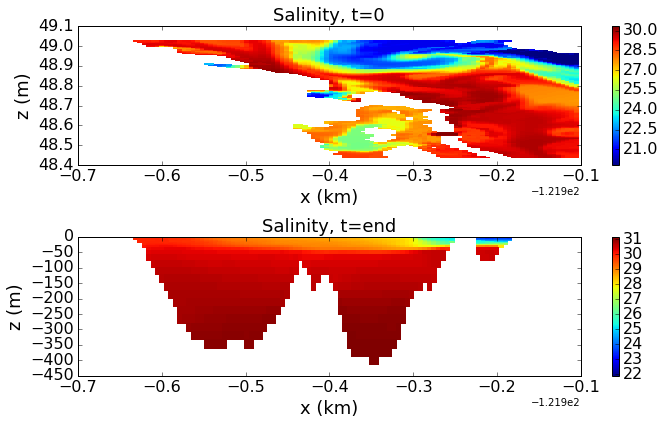

In [5]:
fig, axs = plt.subplots(2,1,figsize=(10,6))
mesh0=axs[0].pcolormesh(x0[400:550,160:270],y0[400:550,160:270],
                        np.ma.masked_where(mesh[0,0,400:550,160:270]==0,f.variables['vosaline'][-1,0,400:550,160:270]))
cb0=fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)', fontsize=18)
axs[0].set_xlabel('x (km)', fontsize=18)
axs[0].set_title('Salinity, t=0', fontsize=18)
#axs[0].autoscale(tight='True')
#axs[0].axis([0, 550, -400, 0])
plt.setp(axs[0].get_xticklabels(),fontsize=16)
plt.setp(axs[0].get_yticklabels(),fontsize=16)
cb0.ax.tick_params(labelsize=16)

mesh1=axs[1].pcolormesh(xx[:,160:270],zz[:,160:270],
                        np.ma.masked_where(mesh[0,:,550,160:270]==0,f.variables['vosaline'][0,:,550,160:270]))
cb1=fig.colorbar(mesh1,ax=axs[1])
axs[1].set_ylabel('z (m)', fontsize=18)
axs[1].set_xlabel('x (km)', fontsize=18)
axs[1].set_title('Salinity, t=end', fontsize=18)
#axs[1].autoscale(tight='True')
#axs[1].axis([0, 550, -400, 0])
plt.setp(axs[1].get_xticklabels(),fontsize=16)
plt.setp(axs[1].get_yticklabels(),fontsize=16)
cb1.ax.tick_params(labelsize=16)
plt.tight_layout()

In [6]:
print(fb.variables['NO3'][-1,0,300,160:270])
print(fb.variables['NO3'][-1,35,300,160:270])

[  0.           0.           0.           0.           0.           0.           0.
   0.          20.75806236  20.7449646   20.67999077  20.56589127
  20.48245621  20.68211937  20.80865097  21.06031418  21.38453484
  21.61954689  21.67110062  21.67424583  21.73333931  21.80269051
  21.8712101   21.88033867  21.84829712  21.80802155  21.76949501
  21.69712448  21.56336975  21.37056923  21.21875     21.31865501
  21.25350761  21.1679554   21.15213585   0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.          21.89769554
  21.58070755  21.78683853  21.99065018  22.03021049  21.9038868
  21.63783073  21.3195343   20.99607086  20.69454575  20.54571152
  20.6607151   21.11418152  21.74199104  22.19041252  22.31955338
  22.13498306  21.60900116  20.90965843  20.31052017  20.03948784
  19.

In [7]:
jj=400

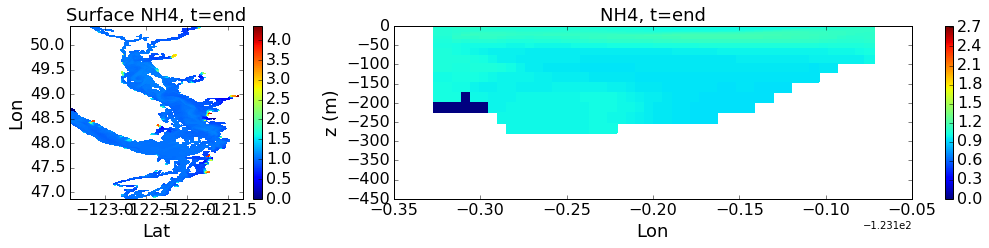

In [10]:
for ik in {'NH4'}:
    if np.size(fb.variables[ik].shape) == 4:
        fig = plt.figure(figsize=(15,3))
        axs=fig.add_axes([.1, .1, .2, .8])
        mesh0=axs.pcolormesh(x0,y0,
                             np.ma.masked_where(mesh[0,0,:,:]==0,fb.variables[ik][-1,0,:,:]))
        cb0=fig.colorbar(mesh0,ax=axs)
        axs.set_ylabel('Lon', fontsize=18)
        axs.set_xlabel('Lat', fontsize=18)
        axs.set_title('Surface ' + ik + ', t=end', fontsize=18)
        #axs.autoscale(tight='True')
        axs.axis([lons[0], lons[-1], lats[0], lats[-1]])
        plt.setp(axs.get_xticklabels(),fontsize=16)
        plt.setp(axs.get_yticklabels(),fontsize=16)
        cb0.ax.tick_params(labelsize=16)
        #axs.axis([-122.3, -122.0, 48, 48.3])
        
        axs1=fig.add_axes([.4, .1, .6, .8])
        mesh1=axs1.pcolormesh(xx[:,0:50],zz[:,0:50],
                              np.ma.masked_where(mesh[0,:,jj,0:50]==0,fb.variables[ik][-1,:,jj,0:50]))
        #                      np.ma.masked_where(mesh[0,:,550,160:270]==0,fb.variables[ik][-16,:,550,160:270]))
        cb1=fig.colorbar(mesh1,ax=axs1)
        axs1.set_ylabel('z (m)', fontsize=18)
        axs1.set_xlabel('Lon', fontsize=18)
        axs1.set_title(ik + ', t=end', fontsize=18)
        #axs[1].autoscale(tight='True')
        #axs1.axis([lons[168],lons[255],-z[-1],-z[0]])
        plt.setp(axs1.get_xticklabels(),fontsize=16)
        plt.setp(axs1.get_yticklabels(),fontsize=16)
        cb1.ax.tick_params(labelsize=16)

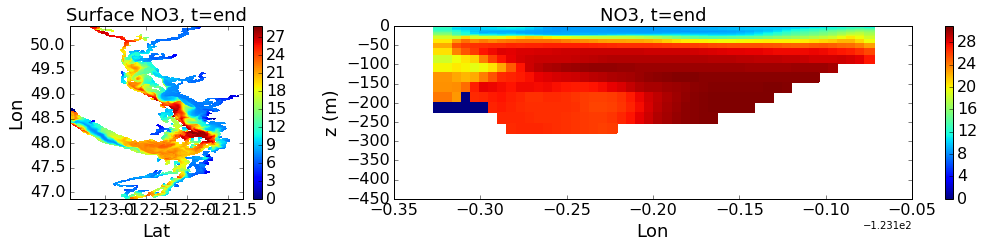

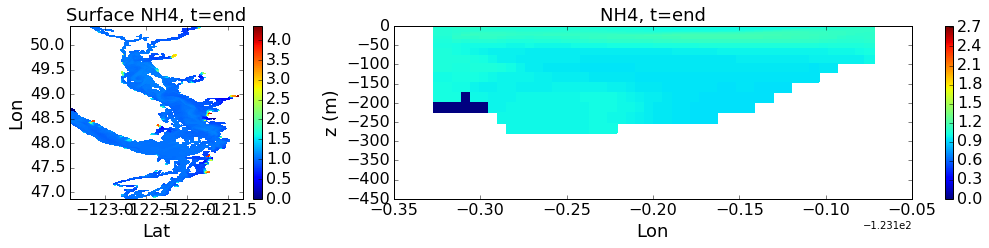

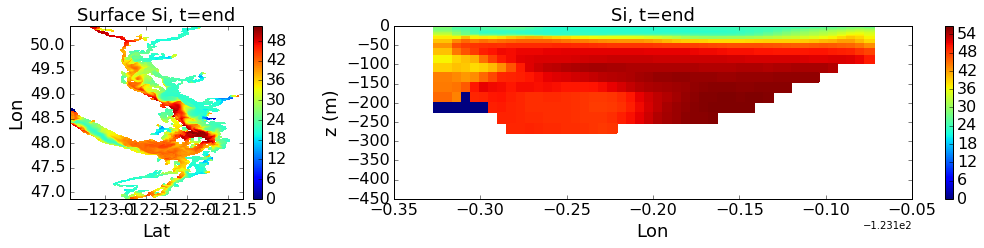

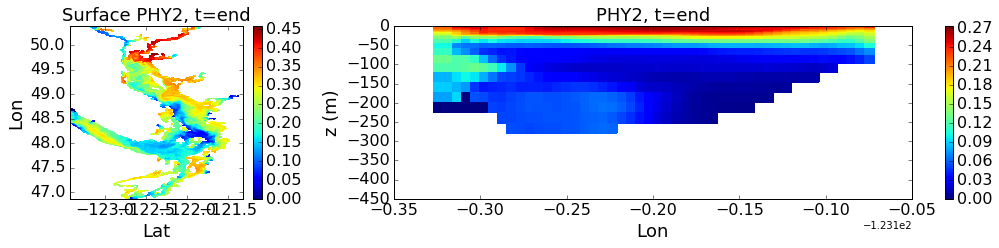

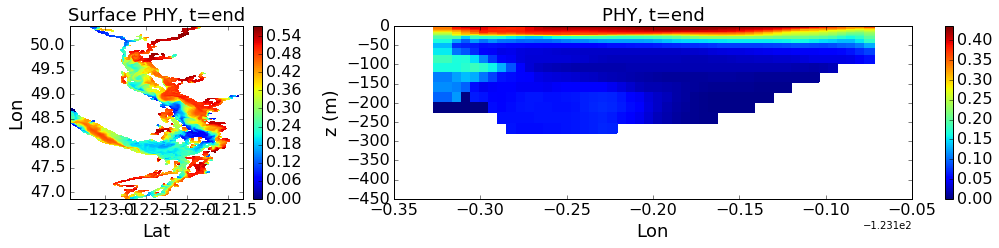

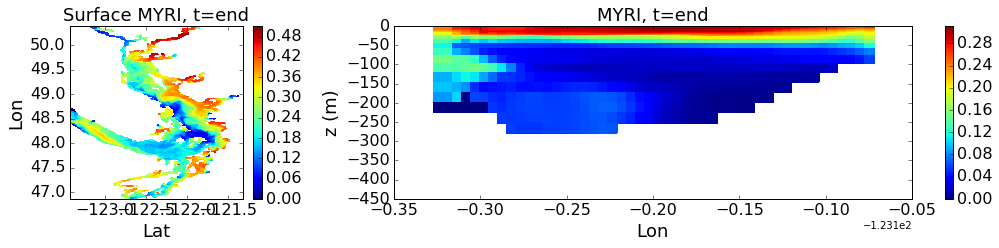

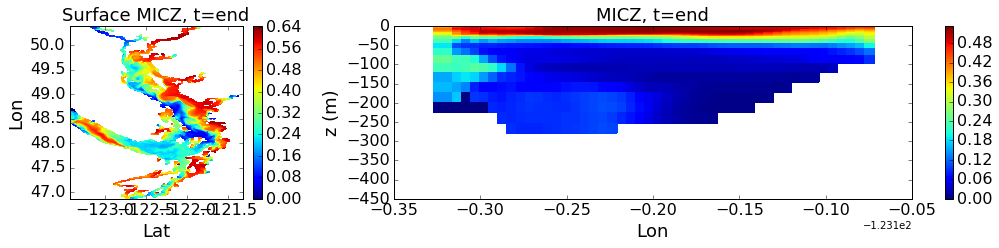

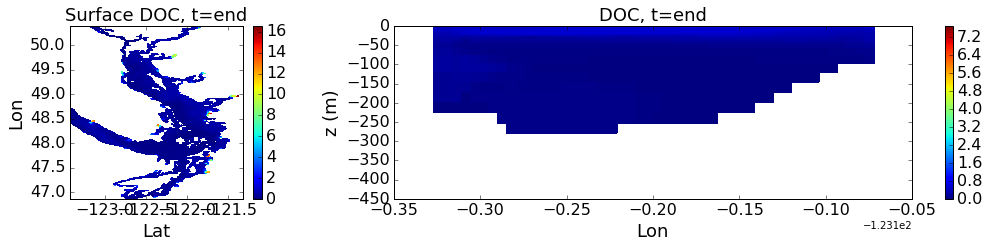

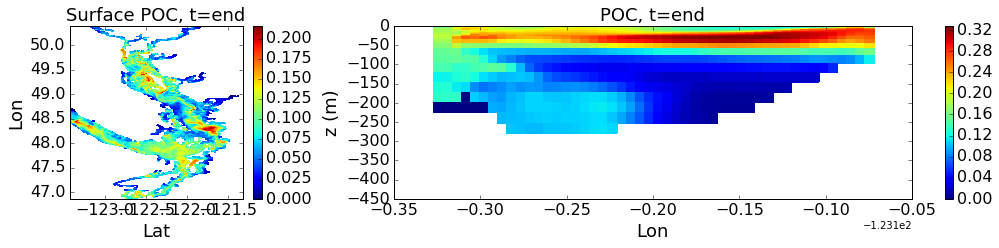

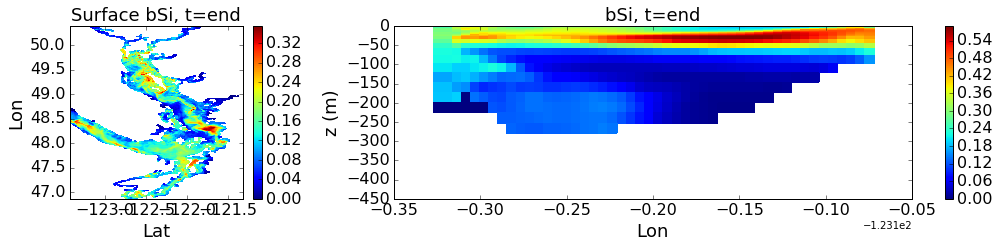

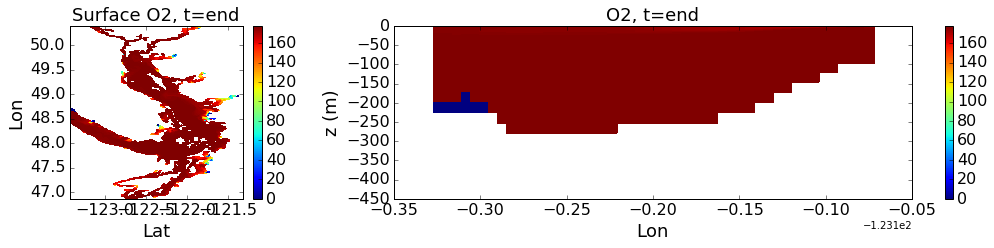

In [8]:
for ik in fkeys:
    if np.size(fb.variables[ik].shape) == 4:
        fig = plt.figure(figsize=(15,3))
        axs=fig.add_axes([.1, .1, .2, .8])
        mesh0=axs.pcolormesh(x0,y0,
                             np.ma.masked_where(mesh[0,0,:,:]==0,fb.variables[ik][-1,0,:,:]))
        cb0=fig.colorbar(mesh0,ax=axs)
        axs.set_ylabel('Lon', fontsize=18)
        axs.set_xlabel('Lat', fontsize=18)
        axs.set_title('Surface ' + ik + ', t=end', fontsize=18)
        #axs.autoscale(tight='True')
        axs.axis([lons[0], lons[-1], lats[0], lats[-1]])
        plt.setp(axs.get_xticklabels(),fontsize=16)
        plt.setp(axs.get_yticklabels(),fontsize=16)
        cb0.ax.tick_params(labelsize=16)
        #axs.axis([-122.3, -122.0, 48, 48.3])
        
        axs1=fig.add_axes([.4, .1, .6, .8])
        mesh1=axs1.pcolormesh(xx[:,0:50],zz[:,0:50],
                              np.ma.masked_where(mesh[0,:,jj,0:50]==0,fb.variables[ik][-1,:,jj,0:50]))
        #                      np.ma.masked_where(mesh[0,:,550,160:270]==0,fb.variables[ik][-16,:,550,160:270]))
        cb1=fig.colorbar(mesh1,ax=axs1)
        axs1.set_ylabel('z (m)', fontsize=18)
        axs1.set_xlabel('Lon', fontsize=18)
        axs1.set_title(ik + ', t=end', fontsize=18)
        #axs[1].autoscale(tight='True')
        #axs1.axis([lons[168],lons[255],-z[-1],-z[0]])
        plt.setp(axs1.get_xticklabels(),fontsize=16)
        plt.setp(axs1.get_yticklabels(),fontsize=16)
        cb1.ax.tick_params(labelsize=16)


In [9]:
np.max(np.isnan(np.ma.masked_where(mesh[0,:,:,:]==0,fb.variables['NH4'][-1,:,:,:])))

False

In [10]:
print(fb.variables['Si'][-1,10,390:410,1])

[ 48.71025467  48.95969391  48.08690262  45.18637466  41.18026352
  39.47531891  38.79560471  36.72389603  33.90073395  31.31261063
  28.51756096  26.97428131  27.51636314  28.81315804  30.60354614
  31.3858223   31.8468914   32.90006256  33.29586029  33.74410629]
